In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
url='E:\ML_FDP_Program\DSBDA Lab\Assignment 2\heart.csv'
import pandas as pd
import numpy as np
df=pd.read_csv(url)

In [118]:
print(df.shape)
print(df.info())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**Check data type**
The variables types are
Binary: sex, fbs, exang, target
Categorical: cp, restecg, slope, ca, thal
Continuous: age, trestbps, chol, thalac, oldpeak

In [119]:
df.dtypes

age           int64
gender        int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [120]:
# to know unique values
df.nunique()

age          41
gender        2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [121]:
# change the numeric type to categorical variables
df['gender'] = df['gender'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
gender       object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [122]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Error Correction**
Check for the data characters mistakes
feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.

In [88]:
df['ca'].unique()


array([0, 2, 1, 3, 4], dtype=object)

In [123]:
# to count the number in of each category decending order
print(df.ca.value_counts())

df[df['ca']==4]

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [129]:
df.loc[df['ca']==4,'ca']=np.NaN

In [91]:
df['ca'].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [124]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=object)

Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN

In [125]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [126]:
df.loc[df['thal']==0,'thal']=np.NaN

In [127]:
df['thal'].unique()

array([1, 2, 3, nan], dtype=object)

Check for missing values and replace **them**

In [130]:
df.isna().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [96]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
df.iloc[0]

age          63
gender        1
cp            3
trestbps    145
chol        233
fbs           1
restecg       0
thalach     150
exang         0
oldpeak     2.3
slope         0
ca            0
thal          1
target        1
Name: 0, dtype: object

In [132]:
print(df.mode())
print(df.mode().iloc[0])

    age gender   cp  trestbps  chol  fbs restecg  thalach exang  oldpeak  \
0  58.0      1    0     120.0   197    0       1    162.0     0      0.0   
1   NaN    NaN  NaN       NaN   204  NaN     NaN      NaN   NaN      NaN   
2   NaN    NaN  NaN       NaN   234  NaN     NaN      NaN   NaN      NaN   

  slope   ca thal  target  
0     2    0    2     1.0  
1   NaN  NaN  NaN     NaN  
2   NaN  NaN  NaN     NaN  
age          58.0
gender          1
cp              0
trestbps    120.0
chol          197
fbs             0
restecg         1
thalach     162.0
exang           0
oldpeak       0.0
slope           2
ca              0
thal            2
target        1.0
Name: 0, dtype: object


In [135]:
print(df.mean())
print(df.mean().iloc[0:14])

age          54.366337
gender        0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.674497
thal          2.328904
target        0.544554
dtype: float64
age          54.366337
gender        0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.674497
thal          2.328904
target        0.544554
dtype: float64


In [100]:
#df = df.fillna(df.median())
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Check for duplicate rows**

In [136]:
df[df.duplicated()]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,NaN,2,1


In [102]:
duplicated=df.duplicated().sum()
print(duplicated)
if duplicated:
  print("Duplicated rows :{}".format(duplicated))
else:
  print("No duplicates")

1
Duplicated rows :1


In [103]:
duplicates=df[df.duplicated(keep=False)]
print(duplicates)
duplicates.head()

     age  gender  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38       1   2       138   175    0        1      173      0      0.0   
164   38       1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
163      2   0     2       1  
164      2   0     2       1  


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1


statistical summary
check on the min and max value for the categorical variables (min-max). Sex (0–1), cp (0–3), fbs (0–1), restecg (0–2), exang (0–1), slope (0–2), ca (0–3), thal (0–3).
Observe the mean, std, 25% and 75% on the continuous variables.

In [104]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Before we plot the outliers, let's change the labeling for better visualization and interpretation.

In [137]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['gender'] = df.gender.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina",
                          1: "atypical_angina",
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

Outliers Detection & Handling

E:\Anaconda\envs\FDP ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


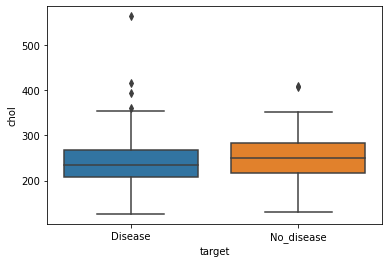

In [138]:
import matplotlib.pyplot as plt
import seaborn as sb
bxplt = sb.boxplot(df["target"],df["chol"])
plt.show()

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

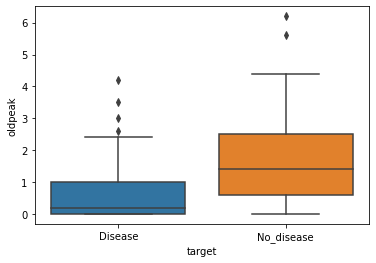

In [107]:
sb.boxplot(x='target', y='oldpeak', data=df)

In [115]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        #outlier_step = IQR * 1.5 #That's we were talking about above
        #outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        ll = Q1 - (1.5*IQR)
        ul = Q3 + (1.5*IQR)
        upper_outliers = feature_data[feature_data > ul].index.tolist()
        lower_outliers = feature_data[feature_data < ll].index.tolist()
        bad_indices = list(set(upper_outliers + lower_outliers))
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, 
                                                                   )))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


Drop Outliers

In [116]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed
